# Comparison of our model for xp4

In [1]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from metrics import compute_WD, compute_PCD, compute_JSD, compute_DKC, compute_density_coverage, compute_CMD, compute_authenticity
from metrics import histogram_JSD, compare_corr_accross_time, compare_acf_timestep, compare_acf_timerange, compare_contingency_accross_time

In [3]:
path = "/home/aschoen/my_storage/aschoen/dataset/flow_chronicle_dataset/"

## Parralel sampling or not

In [19]:
xp = "xp4"
train = pd.read_csv(path+xp+"/CIDDS_"+xp+"_train.csv")
test = pd.read_csv(path+xp+"/CIDDS_"+xp+"_test.csv")
test["Date first seen"] = pd.to_datetime(test["Date first seen"])-pd.to_timedelta(7*3600*24,unit="s")

In [20]:
parral = pd.read_csv(path+xp+"/our_load_parrallelize_syn.csv")
not_paral = pd.read_csv(path+xp+"/our_load_syn.csv")

In [21]:
datasets = [test, train, parral, not_paral]

### independant evaluation

In [18]:
continuous = ['Date first seen', 'In Byte', 'Out Byte']
discrete = ['Proto', 'Src IP Addr', 'Dst IP Addr', 'Dst Pt']

In [19]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_datetime(datasets[i]['Date first seen'])
    datasets[i] = datasets[i].sort_values("Date first seen")
    datasets[i][continuous] = datasets[i][continuous].astype(int)
    datasets[i]["Proto"] = datasets[i]["Proto"].str.strip()
    datasets[i]["Date first seen"] = datasets[i]["Date first seen"] / 1e15
    datasets[i] = datasets[i][train.columns]

In [20]:
n = 1000
n_test = 20

metrics = ['JSD', 'EMD', 'PCD', 'CMD', 'Density', 'Coverage', 'Novelty', 'DKC']
models = ['Train', 'load_parrallelize', 'load_normal']

jsd = np.ones((n_test, len(models)))
emd = np.ones((n_test, len(models)))
cmd= np.ones(jsd.shape)
pcd = np.ones(jsd.shape)
density = np.ones(jsd.shape)
coverage = np.ones(jsd.shape)
authenticity = np.ones(jsd.shape)
dkc = np.ones(jsd.shape)

In [21]:
for i in range(n_test):
    tr = datasets[0].sample(n)
    for j, m in enumerate(datasets[1:]):
        m = m.sample(n)
        jsd[i,j] = compute_JSD(tr.loc[:,discrete], m.loc[:,discrete])
        emd[i,j] = compute_WD(tr.loc[:,continuous], m.loc[:,continuous])
        pcd[i,j] = compute_PCD(tr.loc[:,continuous], m.loc[:,continuous])
        cmd[i,j] = compute_CMD(tr.loc[:,discrete], m.loc[:,discrete])
        density[i,j], coverage[i,j] = compute_density_coverage(tr, m)
        authenticity[i, j] = compute_authenticity(datasets[1].sample(n), tr, m)
        dkc[i, j] = compute_DKC(m)
        print(i, models[j])

Num real: 1000 Num fake: 1000
0 Train
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


0 load_parrallelize
Num real: 1000 Num fake: 1000
0 load_normal
Num real: 1000 Num fake: 1000
1 Train
Num real: 1000 Num fake: 1000
1 load_parrallelize
Num real: 1000 Num fake: 1000
1 load_normal
Num real: 1000 Num fake: 1000
2 Train
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


2 load_parrallelize
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


2 load_normal
Num real: 1000 Num fake: 1000
3 Train
Num real: 1000 Num fake: 1000
3 load_parrallelize
Num real: 1000 Num fake: 1000
3 load_normal
Num real: 1000 Num fake: 1000
4 Train
Num real: 1000 Num fake: 1000
4 load_parrallelize
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


4 load_normal
Num real: 1000 Num fake: 1000
5 Train
Num real: 1000 Num fake: 1000
5 load_parrallelize
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


5 load_normal
Num real: 1000 Num fake: 1000
6 Train
Num real: 1000 Num fake: 1000
6 load_parrallelize
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


6 load_normal
Num real: 1000 Num fake: 1000
7 Train
Num real: 1000 Num fake: 1000
7 load_parrallelize
Num real: 1000 Num fake: 1000
7 load_normal
Num real: 1000 Num fake: 1000
8 Train
Num real: 1000 Num fake: 1000
8 load_parrallelize
Num real: 1000 Num fake: 1000
8 load_normal
Num real: 1000 Num fake: 1000
9 Train
Num real: 1000 Num fake: 1000
9 load_parrallelize
Num real: 1000 Num fake: 1000
9 load_normal
Num real: 1000 Num fake: 1000
10 Train
Num real: 1000 Num fake: 1000
10 load_parrallelize
Num real: 1000 Num fake: 1000
10 load_normal
Num real: 1000 Num fake: 1000
11 Train
Num real: 1000 Num fake: 1000
11 load_parrallelize
Num real: 1000 Num fake: 1000
11 load_normal
Num real: 1000 Num fake: 1000
12 Train
Num real: 1000 Num fake: 1000
12 load_parrallelize
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


12 load_normal
Num real: 1000 Num fake: 1000
13 Train
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


13 load_parrallelize
Num real: 1000 Num fake: 1000
13 load_normal
Num real: 1000 Num fake: 1000
14 Train
Num real: 1000 Num fake: 1000
14 load_parrallelize
Num real: 1000 Num fake: 1000
14 load_normal
Num real: 1000 Num fake: 1000
15 Train
Num real: 1000 Num fake: 1000
15 load_parrallelize
Num real: 1000 Num fake: 1000
15 load_normal
Num real: 1000 Num fake: 1000
16 Train
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


16 load_parrallelize
Num real: 1000 Num fake: 1000
16 load_normal
Num real: 1000 Num fake: 1000
17 Train
Num real: 1000 Num fake: 1000
17 load_parrallelize
Num real: 1000 Num fake: 1000
17 load_normal
Num real: 1000 Num fake: 1000
18 Train
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


18 load_parrallelize
Num real: 1000 Num fake: 1000
18 load_normal
Num real: 1000 Num fake: 1000
19 Train
Num real: 1000 Num fake: 1000
19 load_parrallelize
Num real: 1000 Num fake: 1000
19 load_normal


In [22]:
result = pd.DataFrame(index=[np.repeat(metrics,n_test),np.arange(len(metrics)*n_test)], columns = models)
result.loc['JSD']=jsd
result.loc["EMD"]=emd
result.loc['PCD']=pcd
result.loc["CMD"]=cmd
result.loc['Density']=density
result.loc['Coverage']=coverage
result.loc['Novelty']=authenticity
result.loc['DKC']=dkc

Text(0.5, 0.05, 'Lower is better, except for Density and Coverage.')

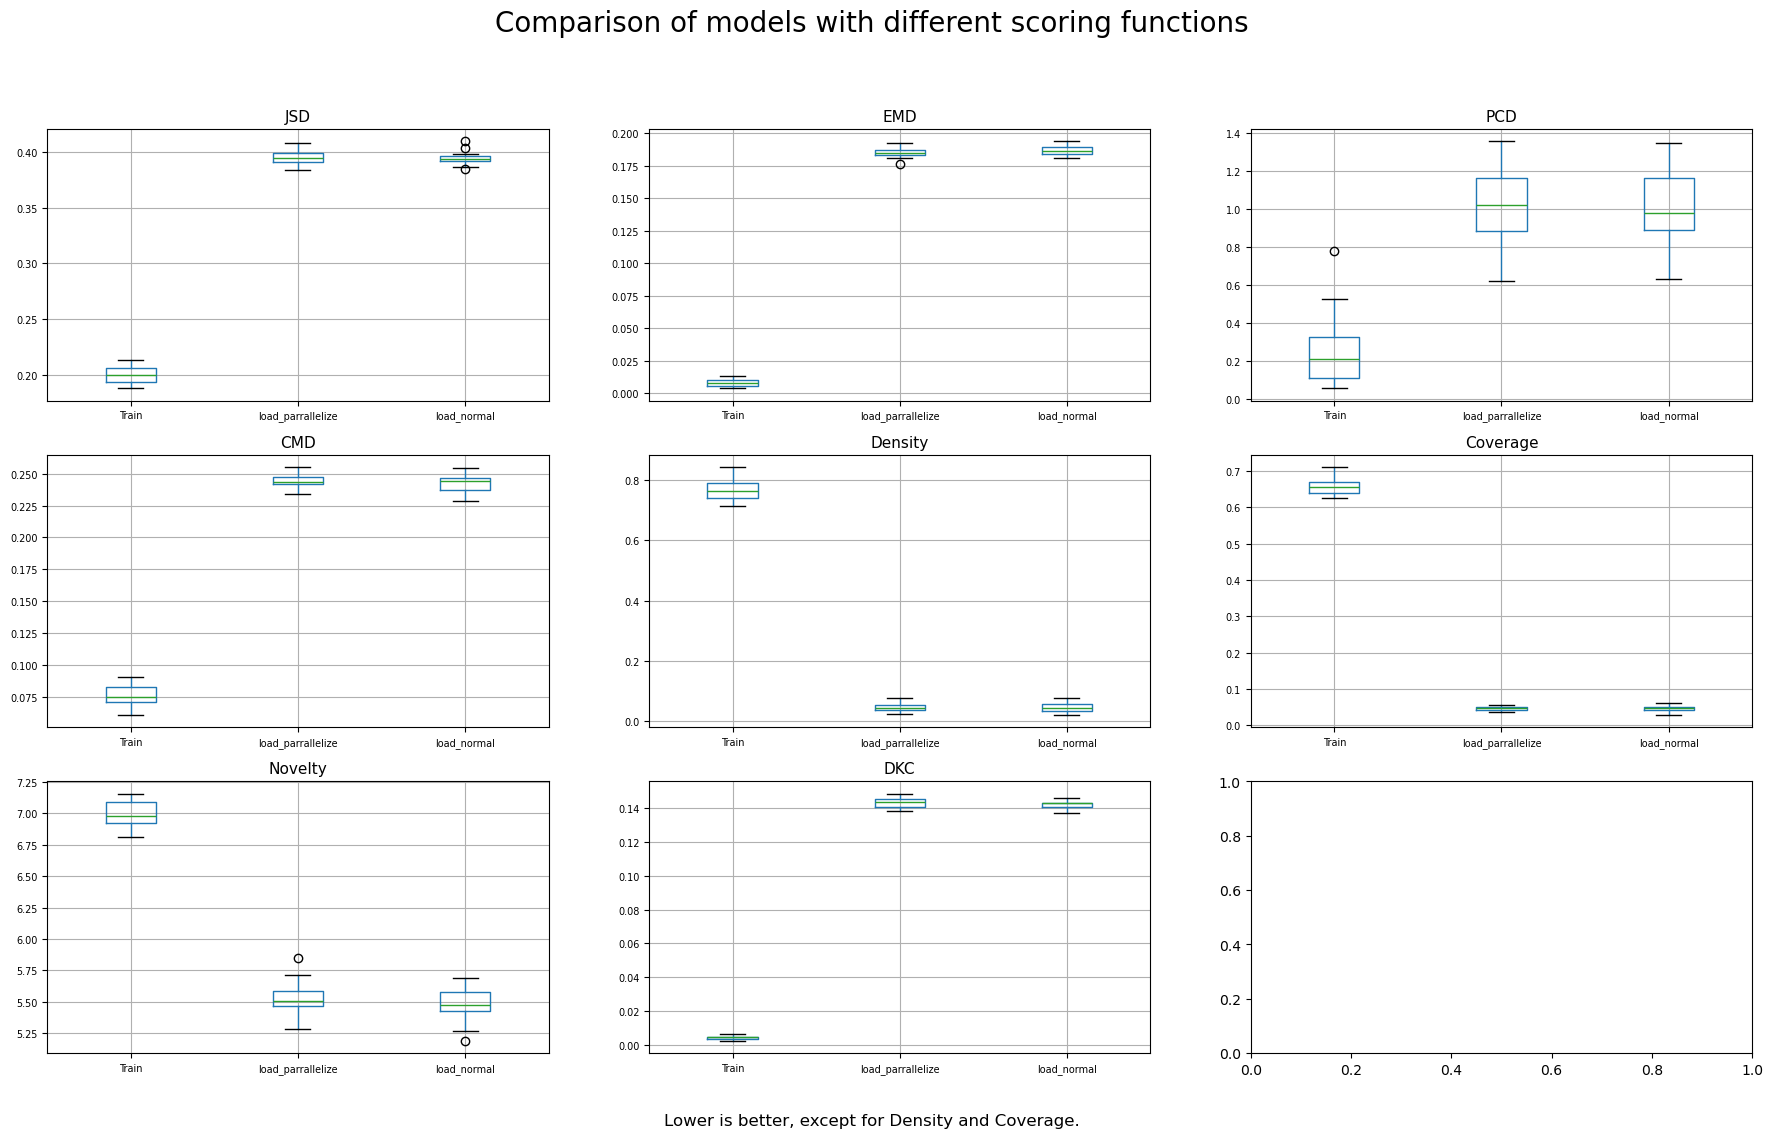

In [23]:
result = result.astype(float)

fig, axs = plt.subplots(3, 3, figsize=(22,12))

for i, metric in enumerate(result.index.get_level_values(0).drop_duplicates()):
    result.loc[metric,list(result.columns)].boxplot(ax = axs[i // 3, i % 3], fontsize=7)
    axs[i // 3, i % 3].set_title(metric, fontsize = 11)

fig.suptitle('Comparison of models with different scoring functions', fontsize = 20)
fig.text(.5, .05,'Lower is better, except for Density and Coverage.', fontsize = 12, ha = 'center')

### Time dependancy

In [22]:
metrics = ['Global_Density', 'Datetime_JSD','Correlation_Timesteps', 'Correlation_Timerange', 'Contingency_comparison']
models = ['Train', 'load_parrallelize', 'load_normal']

continuous = ['In Byte', 'Out Byte']
discrete = ['Proto', 'Src IP Addr', 'Dst IP Addr', 'Dst Pt']
#discrete = ['Proto', 'Src IP Addr', 'Dst Pt']

In [23]:
datasets = [test, train, parral, not_paral]

In [24]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_datetime(datasets[i]['Date first seen'])
    datasets[i] = datasets[i].sort_values("Date first seen")
    #datasets[i] = datasets[i][datasets[i]["Date first seen"].dt.dayofweek == 1]
    datasets[i][continuous] = datasets[i][continuous].astype(int)
    #datasets[i].loc[(datasets[i]["Dst IP Addr"].str.contains("_")) & (datasets[i]["Dst IP Addr"] != "EXT_SERVER"),"Dst IP Addr"] = "IP_PUB"
    datasets[i].index=datasets[i].pop("Date first seen")

In [25]:
globdens = np.asarray([len(u)/len(test) for u in datasets[1:]])
print(globdens)

[1.03372657 1.36663607 1.37335287]


In [26]:
combined_td = pd.concat([u.groupby(pd.Grouper(freq='6H')).size() for u in datasets], axis=1)
combined_td.columns = ["Test"] + models
combined_td.fillna(0, inplace=True)

<Axes: xlabel='Date first seen'>

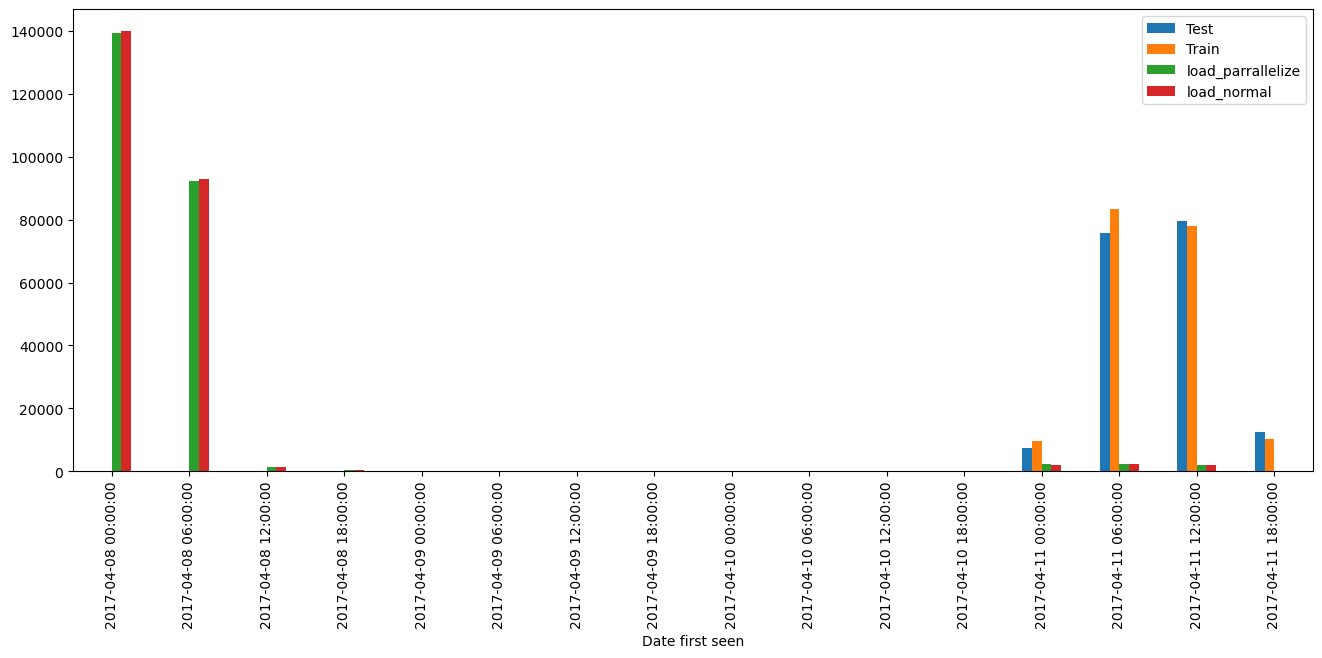

In [27]:
combined_td.plot(kind = 'bar', figsize=(16, 6)) #Without transformer

In [51]:
datejsd = np.asarray([histogram_JSD(combined_td["Test"].to_numpy(), combined_td[col].to_numpy()) for col in combined_td.columns[1:]])
print(datejsd)

[0.01457044 0.25864647 0.25304721]


In [54]:
crrstep = np.zeros((1, len(models)))
crrtime = np.zeros((1, len(models)))
#contdiff = np.zeros((1, len(models)))

threshold = 10

categories = ['Src IP Addr']

for (i, (category1, tr)) in enumerate(datasets[0].groupby(categories)):
    evaluate = True
    for m in datasets:
        if evaluate:
            m = m[m['Src IP Addr'] == category1]
            evaluate =  len(m) > threshold and m[[col for col in m.columns if col not in categories]].nunique().min()>1
        else:
            break
    if evaluate:
        print((category1), len(tr))
        l = [[],[],[]]
        l = [[],[]]
        for j, m in enumerate(datasets[1:]):
            m = m[m['Src IP Addr'] == category1]
            l[0].append(len(tr) * compare_acf_timestep(tr[continuous], m[continuous]))
            l[1].append(len(tr) * compare_acf_timerange(tr[continuous], m[continuous]))
            #l[2].append(len(tr) * compare_contingency_accross_time(tr[discrete], m[discrete]))
            print(models[j],"done")
        crrstep = np.append(crrstep, np.asarray(l[0]).reshape(1, -1),axis=0)
        crrtime = np.append(crrtime, np.asarray(l[1]).reshape(1, -1),axis=0)
        #contdiff = np.append(contdiff, np.asarray(l[2]).reshape(1, -1),axis=0)

/tmp/ipykernel_37728/1964926469.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (i, (category1, tr)) in enumerate(datasets[0].groupby(categories)):


192.168.100.3 153
Train done
load_parrallelize done
load_normal done
192.168.100.4 1959
Train done
load_parrallelize done
load_normal done
192.168.100.5 408
Train done
load_parrallelize done
load_normal done
192.168.200.3 167
Train done
load_parrallelize done
load_normal done
192.168.200.4 6527
Train done
load_parrallelize done
load_normal done
192.168.200.5 2578
Train done
load_parrallelize done
load_normal done
192.168.200.8 6848
Train done
load_parrallelize done
load_normal done
192.168.200.9 10376
Train done
load_parrallelize done
load_normal done
192.168.210.3 157
Train done
load_parrallelize done
load_normal done
192.168.210.4 16198
Train done
load_parrallelize done
load_normal done
192.168.210.5 9835
Train done
load_parrallelize done
load_normal done
192.168.220.10 3829
Train done
load_parrallelize done
load_normal done
192.168.220.11 11258
Train done
load_parrallelize done
load_normal done
192.168.220.13 13916
Train done
load_parrallelize done
load_normal done
192.168.220.14 13

In [55]:
crrstep = np.nansum(crrstep, axis=0)
crrtime = np.nansum(crrtime, axis=0)
#contdiff = np.nansum(contdiff, axis=0)

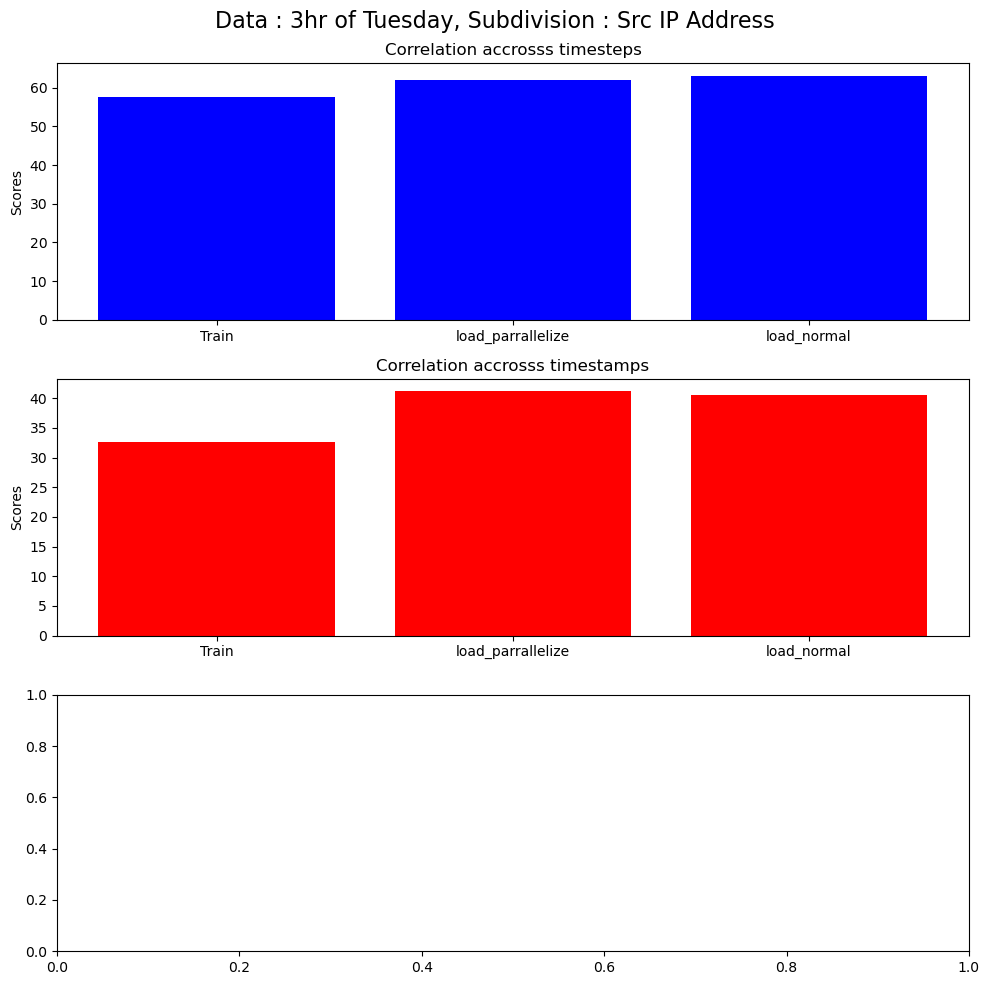

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plotting the first array of scores
ax1.bar(models, crrstep, color='blue')
ax1.set_title('Correlation accrosss timesteps')
ax1.set_ylabel('Scores')

# Plotting the second array of scores
ax2.bar(models, crrtime, color='red')
ax2.set_title('Correlation accrosss timestamps')
ax2.set_ylabel('Scores')

# Show the plot
fig.suptitle('Data : 3hr of Tuesday, Subdivision : Src IP Address', fontsize=16)
plt.tight_layout()
plt.show()

## number of splits

In [5]:
xp = "xp4"
train = pd.read_csv(path+xp+"/CIDDS_"+xp+"_train.csv")
test = pd.read_csv(path+xp+"/CIDDS_"+xp+"_test.csv")
test["Date first seen"] = pd.to_datetime(test["Date first seen"])-pd.to_timedelta(7*3600*24,unit="s")

In [6]:
split_50 = pd.read_csv(path+xp+"/our_split50_syn.csv")
split_100 = pd.read_csv(path+xp+"/our_split100_syn.csv")
split_400 = pd.read_csv(path+xp+"/our_split400_syn.csv")
split_a = pd.read_csv(path+xp+"/our_split400_a_syn.csv")

In [7]:
datasets = [train, test, split_50, split_100, split_400, split_a]

### independant evaluation

In [32]:
continuous = ['Date first seen', 'In Byte', 'Out Byte']
discrete = ['Proto', 'Src IP Addr', 'Dst IP Addr', 'Dst Pt']

In [33]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_datetime(datasets[i]['Date first seen'])
    datasets[i] = datasets[i].sort_values("Date first seen")
    datasets[i][continuous] = datasets[i][continuous].astype(int)
    datasets[i]["Proto"] = datasets[i]["Proto"].str.strip()
    datasets[i]["Date first seen"] = datasets[i]["Date first seen"] / 1e15
    datasets[i] = datasets[i][train.columns]

In [34]:
n = 1000
n_test = 20

metrics = ['JSD', 'EMD', 'PCD', 'CMD', 'Density', 'Coverage', 'Novelty', 'DKC']
models = ['Test', 'split_50', 'split_100', 'split_400']

jsd = np.ones((n_test, len(models)))
emd = np.ones((n_test, len(models)))
cmd= np.ones(jsd.shape)
pcd = np.ones(jsd.shape)
density = np.ones(jsd.shape)
coverage = np.ones(jsd.shape)
authenticity = np.ones(jsd.shape)
dkc = np.ones(jsd.shape)

In [35]:
for i in range(n_test):
    tr = datasets[0].sample(n)
    for j, m in enumerate(datasets[1:]):
        m = m.sample(n)
        jsd[i,j] = compute_JSD(tr.loc[:,discrete], m.loc[:,discrete])
        emd[i,j] = compute_WD(tr.loc[:,continuous], m.loc[:,continuous])
        pcd[i,j] = compute_PCD(tr.loc[:,continuous], m.loc[:,continuous])
        cmd[i,j] = compute_CMD(tr.loc[:,discrete], m.loc[:,discrete])
        density[i,j], coverage[i,j] = compute_density_coverage(tr, m)
        authenticity[i, j] = compute_authenticity(datasets[1].sample(n), tr, m)
        dkc[i, j] = compute_DKC(m)
        print(i, models[j])

Num real: 1000 Num fake: 1000
0 Test
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


0 split_50
Num real: 1000 Num fake: 1000
0 split_100
Num real: 1000 Num fake: 1000
0 split_400
Num real: 1000 Num fake: 1000
1 Test
Num real: 1000 Num fake: 1000
1 split_50
Num real: 1000 Num fake: 1000
1 split_100
Num real: 1000 Num fake: 1000
1 split_400
Num real: 1000 Num fake: 1000
2 Test
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


2 split_50
Num real: 1000 Num fake: 1000
2 split_100
Num real: 1000 Num fake: 1000
2 split_400
Num real: 1000 Num fake: 1000
3 Test
Num real: 1000 Num fake: 1000
3 split_50
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


3 split_100
Num real: 1000 Num fake: 1000
3 split_400
Num real: 1000 Num fake: 1000
4 Test
Num real: 1000 Num fake: 1000
4 split_50
Num real: 1000 Num fake: 1000
4 split_100
Num real: 1000 Num fake: 1000
4 split_400
Num real: 1000 Num fake: 1000
5 Test
Num real: 1000 Num fake: 1000
5 split_50
Num real: 1000 Num fake: 1000
5 split_100
Num real: 1000 Num fake: 1000
5 split_400
Num real: 1000 Num fake: 1000
6 Test
Num real: 1000 Num fake: 1000
6 split_50
Num real: 1000 Num fake: 1000
6 split_100
Num real: 1000 Num fake: 1000
6 split_400
Num real: 1000 Num fake: 1000
7 Test
Num real: 1000 Num fake: 1000
7 split_50
Num real: 1000 Num fake: 1000
7 split_100
Num real: 1000 Num fake: 1000
7 split_400
Num real: 1000 Num fake: 1000
8 Test
Num real: 1000 Num fake: 1000
8 split_50
Num real: 1000 Num fake: 1000
8 split_100
Num real: 1000 Num fake: 1000
8 split_400
Num real: 1000 Num fake: 1000
9 Test
Num real: 1000 Num fake: 1000
9 split_50
Num real: 1000 Num fake: 1000
9 split_100
Num real: 1000 N

/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


14 split_50
Num real: 1000 Num fake: 1000
14 split_100
Num real: 1000 Num fake: 1000
14 split_400
Num real: 1000 Num fake: 1000
15 Test
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


15 split_50
Num real: 1000 Num fake: 1000
15 split_100
Num real: 1000 Num fake: 1000
15 split_400
Num real: 1000 Num fake: 1000
16 Test
Num real: 1000 Num fake: 1000
16 split_50
Num real: 1000 Num fake: 1000
16 split_100
Num real: 1000 Num fake: 1000
16 split_400
Num real: 1000 Num fake: 1000
17 Test
Num real: 1000 Num fake: 1000
17 split_50
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


17 split_100
Num real: 1000 Num fake: 1000
17 split_400
Num real: 1000 Num fake: 1000
18 Test
Num real: 1000 Num fake: 1000
18 split_50
Num real: 1000 Num fake: 1000
18 split_100
Num real: 1000 Num fake: 1000


/home/aschoen/programs/FlowChronicle/notebooks/../metrics.py:152: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


18 split_400
Num real: 1000 Num fake: 1000
19 Test
Num real: 1000 Num fake: 1000
19 split_50
Num real: 1000 Num fake: 1000
19 split_100
Num real: 1000 Num fake: 1000
19 split_400


In [36]:
result = pd.DataFrame(index=[np.repeat(metrics,n_test),np.arange(len(metrics)*n_test)], columns = models)
result.loc['JSD']=jsd
result.loc["EMD"]=emd
result.loc['PCD']=pcd
result.loc["CMD"]=cmd
result.loc['Density']=density
result.loc['Coverage']=coverage
result.loc['Novelty']=authenticity
result.loc['DKC']=dkc

Text(0.5, 0.05, 'Lower is better, except for Density and Coverage.')

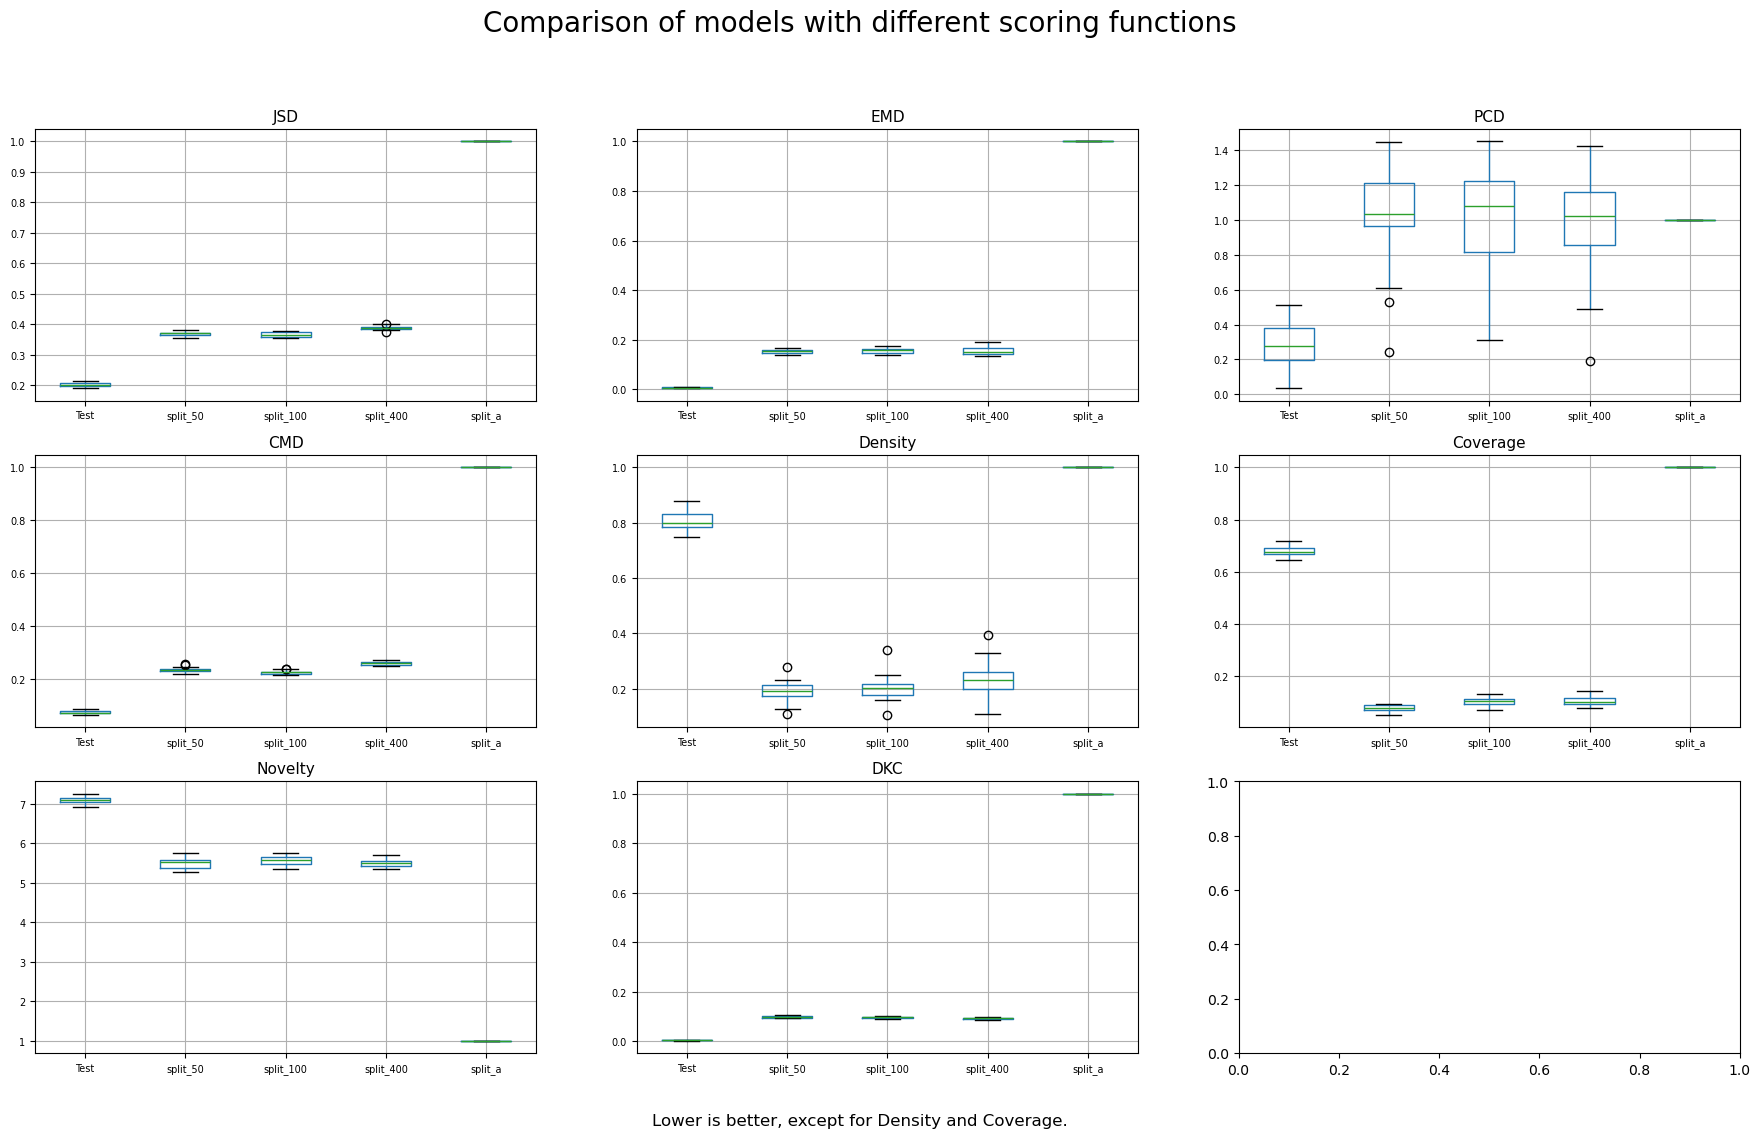

In [37]:
result = result.astype(float)

fig, axs = plt.subplots(3, 3, figsize=(22,12))

for i, metric in enumerate(result.index.get_level_values(0).drop_duplicates()):
    result.loc[metric,list(result.columns)].boxplot(ax = axs[i // 3, i % 3], fontsize=7)
    axs[i // 3, i % 3].set_title(metric, fontsize = 11)

fig.suptitle('Comparison of models with different scoring functions', fontsize = 20)
fig.text(.5, .05,'Lower is better, except for Density and Coverage.', fontsize = 12, ha = 'center')

### Time dependancy

In [8]:
metrics = ['Global_Density', 'Datetime_JSD','Correlation_Timesteps', 'Correlation_Timerange', 'Contingency_comparison']
models = ['Test', 'split_50', 'split_100', 'split_400', 'split_a']

continuous = ['In Byte', 'Out Byte']
discrete = ['Proto', 'Src IP Addr', 'Dst IP Addr', 'Dst Pt']
#discrete = ['Proto', 'Src IP Addr', 'Dst Pt']

In [9]:
datasets = [test, train, split_50, split_100, split_400, split_a]

In [10]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_datetime(datasets[i]['Date first seen'])
    datasets[i] = datasets[i].sort_values("Date first seen")
    datasets[i][continuous] = datasets[i][continuous].astype(int)
    #datasets[i].loc[(datasets[i]["Dst IP Addr"].str.contains("_")) & (datasets[i]["Dst IP Addr"] != "EXT_SERVER"),"Dst IP Addr"] = "IP_PUB"
    datasets[i].index=datasets[i].pop("Date first seen")

In [11]:
globdens = np.asarray([len(u)/len(test) for u in datasets[1:]])
print(globdens)

[1.03372657 1.00993266 1.01751045 1.01067961 1.01016644]


In [12]:
combined_td = pd.concat([u.groupby(pd.Grouper(freq='1H')).size() for u in datasets], axis=1)
combined_td.columns = ["Test"] + models
combined_td.fillna(0, inplace=True)

<Axes: xlabel='Date first seen'>

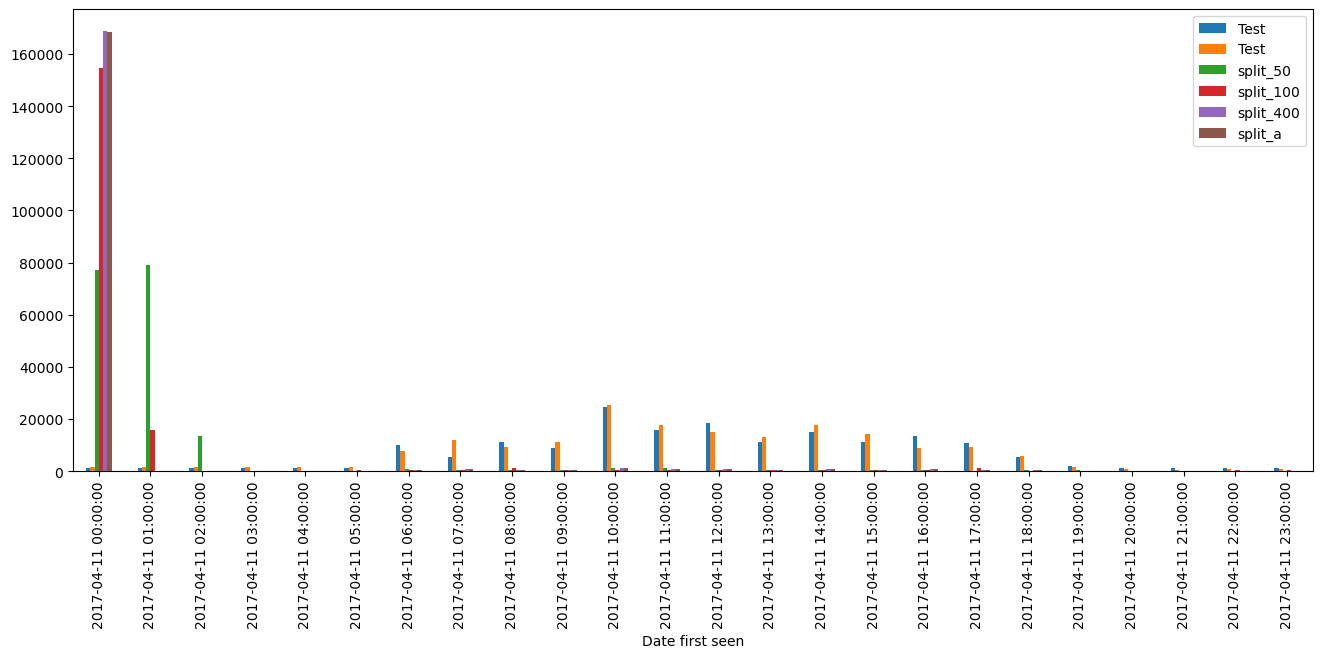

In [13]:
combined_td.plot(kind = 'bar', figsize=(16, 6)) #Without transformer

In [95]:
datejsd = np.asarray([histogram_JSD(combined_td["Test"].to_numpy(), combined_td[col].to_numpy()) for col in combined_td.columns[1:]])
print(datejsd)

[0.01457044 1.85972197 2.24546141 2.43150212]


In [97]:
crrstep = np.zeros((1, len(models)))
crrtime = np.zeros((1, len(models)))

threshold = 10

categories = ['Src IP Addr']

for (i, (category1, tr)) in enumerate(datasets[0].groupby(categories)):
    evaluate = True
    for m in datasets:
        if evaluate:
            m = m[m['Src IP Addr'] == category1]
            evaluate =  len(m) > threshold and m[[col for col in m.columns if col not in categories]].nunique().min()>1
        else:
            break
    if evaluate:
        print((category1), len(tr))
        l = [[],[]]
        for j, m in enumerate(datasets[1:]):
            m = m[m['Src IP Addr'] == category1]
            l[0].append(len(tr) * compare_acf_timestep(tr[continuous], m[continuous]))
            l[1].append(len(tr) * compare_acf_timerange(tr[continuous], m[continuous]))
            print(models[j],"done")
        crrstep = np.append(crrstep, np.asarray(l[0]).reshape(1, -1),axis=0)
        crrtime = np.append(crrtime, np.asarray(l[1]).reshape(1, -1),axis=0)

/tmp/ipykernel_37728/159346789.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (i, (category1, tr)) in enumerate(datasets[0].groupby(categories)):


192.168.100.3 153
Train done
split_50 done
split_100 done
split_400 done
192.168.100.4 1959
Train done
split_50 done
split_100 done
split_400 done
192.168.100.5 408
Train done
split_50 done
split_100 done
split_400 done
192.168.200.3 167
Train done
split_50 done
split_100 done
split_400 done
192.168.200.4 6527
Train done
split_50 done
split_100 done
split_400 done
192.168.200.5 2578
Train done
split_50 done
split_100 done
split_400 done
192.168.200.8 6848
Train done
split_50 done
split_100 done
split_400 done
192.168.200.9 10376
Train done
split_50 done
split_100 done
split_400 done
192.168.210.3 157
Train done
split_50 done
split_100 done
split_400 done
192.168.210.4 16198
Train done
split_50 done
split_100 done
split_400 done
192.168.210.5 9835
Train done
split_50 done
split_100 done
split_400 done
192.168.220.10 3829
Train done
split_50 done
split_100 done
split_400 done
192.168.220.11 11258
Train done
split_50 done
split_100 done
split_400 done
192.168.220.13 13916
Train done
split

In [98]:
crrstep = np.nansum(crrstep, axis=0)
crrtime = np.nansum(crrtime, axis=0)

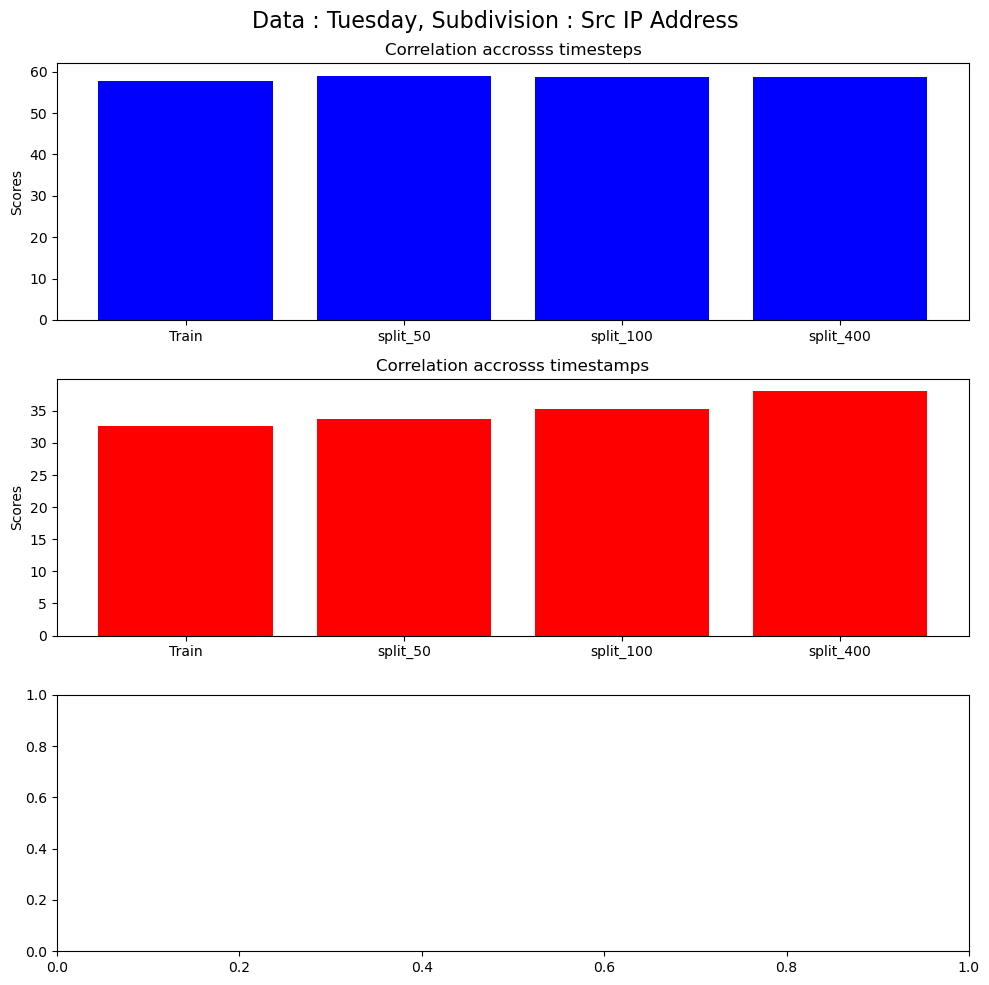

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plotting the first array of scores
ax1.bar(models, crrstep, color='blue')
ax1.set_title('Correlation accrosss timesteps')
ax1.set_ylabel('Scores')

# Plotting the second array of scores
ax2.bar(models, crrtime, color='red')
ax2.set_title('Correlation accrosss timestamps')
ax2.set_ylabel('Scores')

# Show the plot
fig.suptitle('Data : Tuesday, Subdivision : Src IP Address', fontsize=16)
plt.tight_layout()
plt.show()

In [100]:
combined_td

,Test,Train,split_50,split_100,split_400
Date first seen,,,,,
2017-04-11 00:00:00,1242,1648,77242,154484,169213
2017-04-11 01:00:00,1244,1698,78925,15888,38
2017-04-11 02:00:00,1186,1611,13398,10,93
2017-04-11 03:00:00,1234,1569,17,30,144
2017-04-11 04:00:00,1285,1670,8,220,133
2017-04-11 05:00:00,1211,1530,29,260,17
2017-04-11 06:00:00,9922,7750,730,345,398
2017-04-11 07:00:00,5390,12095,396,431,535
2017-04-11 08:00:00,11330,9267,569,1111,488


In [61]:
(pd.to_datetime(not_paral["Date first seen"]).dt.hour == 1).sum()

19650

In [75]:
(not_paral["Date first seen"].dt.dayofweek==7).sum()

0

In [76]:
combined_td

,Test,Test,split_50,split_100,split_400
Date first seen,,,,,
2017-04-11 00:00:00,1242,1648,77242,154484,168645
2017-04-11 01:00:00,1244,1698,78925,15888,34
2017-04-11 02:00:00,1186,1611,13398,10,123
2017-04-11 03:00:00,1234,1569,17,30,148
2017-04-11 04:00:00,1285,1670,8,220,99
2017-04-11 05:00:00,1211,1530,29,260,19
2017-04-11 06:00:00,9922,7750,730,345,436
2017-04-11 07:00:00,5390,12095,396,431,675
2017-04-11 08:00:00,11330,9267,569,1111,406


In [15]:
split_400

,Date first seen,Proto,Src IP Addr,Dst IP Addr,Dst Pt,In Byte,Out Byte
0,2017-04-11 00:00:00.792127251,UDP,192.168.210.4,DNS,53.0,4333,81
1,2017-04-11 00:00:00.792222679,UDP,192.168.210.4,192.168.210.255,53.0,4568,3207
2,2017-04-11 00:00:00.792437691,UDP,192.168.210.4,DNS,53.0,135,82
3,2017-04-11 00:00:00.792464171,UDP,192.168.210.4,DNS,53.0,391,74
4,2017-04-11 00:00:00.792500693,UDP,192.168.210.4,10425_118,53.0,223,1859
...,...,...,...,...,...,...,...
177249,2017-04-11 23:39:33.703313395,UDP,192.168.100.6,192.168.220.255,8000.0,705,651
177250,2017-04-11 23:57:39.012997885,UDP,192.168.220.11,10321_204,8000.0,677,694
177251,2017-04-11 23:57:39.013507375,TCP,192.168.220.15,11010_57,80.0,627,1074
177252,2017-04-11 23:57:39.031720885,UDP,192.168.200.8,10754_14,138.0,14,18


In [34]:
u.groupby(pd.Grouper(freq='1H')).size()

Date first seen
2017-04-11 00:00:00    168645
2017-04-11 01:00:00        34
2017-04-11 02:00:00       123
2017-04-11 03:00:00       148
2017-04-11 04:00:00        99
2017-04-11 05:00:00        19
2017-04-11 06:00:00       436
2017-04-11 07:00:00       675
2017-04-11 08:00:00       406
2017-04-11 09:00:00       491
2017-04-11 10:00:00      1141
2017-04-11 11:00:00       694
2017-04-11 12:00:00       653
2017-04-11 13:00:00       562
2017-04-11 14:00:00       668
2017-04-11 15:00:00       590
2017-04-11 16:00:00       643
2017-04-11 17:00:00       411
2017-04-11 18:00:00       379
2017-04-11 19:00:00        85
2017-04-11 20:00:00        36
2017-04-11 21:00:00       162
2017-04-11 22:00:00        28
2017-04-11 23:00:00        36
Freq: H, dtype: int64

In [32]:
u.index=u["Date first seen"]